## Example of how to download a raster area using the GHSPOPDownloader class

#### Download Raster GSH-POP Area giving an address

BoundingBox(7.551698922988004, 44.935719873587324, 7.8219691932582744, 45.2059901438576)


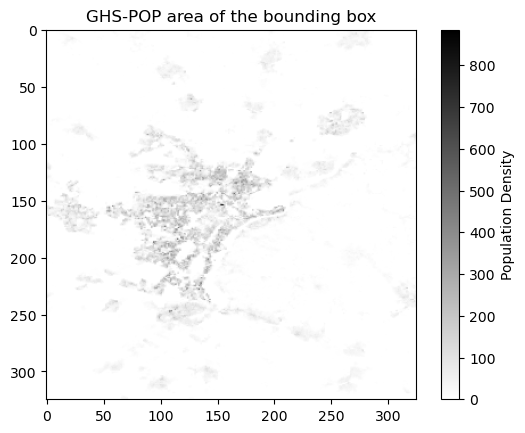

In [4]:
from PyQt5.QtCore.QUrl import query

from data.boundingbox.BoundingBox import BoundingBox
from data.downloader.GHSPOPDownloader import GHSPOPDownloader

query = "Piazza Castello, Torino"
bbox = BoundingBox()
bounding_box = bbox.get_bounding_box(query=query, method="from_center_radius", radius_km=15)
# we are using the "from_center_radius" method to get the bounding box coordinates, it gets the bounding box from a center point and a radius in km
# different methods are available to get the bounding box coordinates, such as "from_coordinates" and "from_geojson"
print(bounding_box)

ghs_pop = GHSPOPDownloader(
        address=query
    )
# we are using the address parameter to get the bounding box coordinates, it gets the bounding box from the address

ghspop_area = ghs_pop.get_population_area(bounding_box) # get the population area from the bounding box
ghspop_data = ghspop_area["data"]

# Plot the raster data
import matplotlib.pyplot as plt

plt.imshow(ghspop_data, cmap='gray_r')
plt.colorbar(label='Population Density')
plt.title('GHS-POP area of the bounding box')
plt.show()

#### Resample the GSH-POP Area giving a raster reference

BoundingBox(7.551698922988004, 44.935719873587324, 7.8219691932582744, 45.2059901438576)
Authenticated using refresh token.


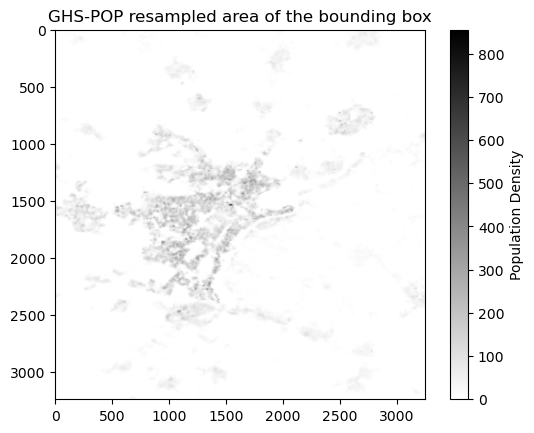

In [1]:
from data.boundingbox.BoundingBox import BoundingBox
from data.downloader.CopernicusDownloader import CopernicusDownloader
from data.downloader.GHSPOPDownloader import GHSPOPDownloader
from data.utils.LandUtils import LandUtils

query = "Piazza Castello, Torino"
shapefile = "../../tiling_schema/WGS84_tile_schema.shp"

copernicus_downloader = CopernicusDownloader(
        client_id="sh-a24a739d-d123-419b-a409-81a190c436c2",
        client_secret="dcUnE32uBB1gLvlxyi3qOeUPdGGpNMRs",
        token_url='https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token'
)

bbox = BoundingBox()
bounding_box = bbox.get_bounding_box(query=query, method="from_center_radius", radius_km=15)
# we are using the "from_center_radius" method to get the bounding box coordinates, it gets the bounding box from a center point and a radius in km
# different methods are available to get the bounding box coordinates, such as "from_coordinates" and "from_geojson"
print(bounding_box)

copernicus_area = copernicus_downloader.download_raster_area(
        bounding_box,
        use_oidc=False
    )

ghs_pop = GHSPOPDownloader(
        address=query,
        shapefile=shapefile
    )

ghspop_area = ghs_pop.get_population_area(bounding_box)

detail_adjuster = LandUtils()
ghs_pop_resampled = detail_adjuster.adjust_detail_level(copernicus_area, ghspop_area)
ghs_pop_resampled_data = ghs_pop_resampled["source"]["data"]

# Plot the raster data
import matplotlib.pyplot as plt
plt.imshow(ghs_pop_resampled_data, cmap='gray_r')
plt.colorbar(label='Population Density')
plt.title('GHS-POP resampled area of the bounding box')
plt.show()